# Trashi Singh

#### Hello everyone,

#### I work on Netflix Movies and TV Shows data set. I use some methos to examine data set.

As you all know, Netflix is a platform to watch quality content. There are so many movies, TV shows, documentaries etc.


### Import librairies

In [1]:
#importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import os

import warnings
warnings.filterwarnings('ignore')

### Loading the data set and performing some basic operations 

In [2]:
# loading and reading the data set 
data = pd.read_csv("netflix_titles.csv")
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [33]:
#checking the shape of the dataset.
print(colored("There are {} rows and {} columns in the dataset.".format(data.shape[0],data.shape[1]),
              attrs=['bold']))

There are 6234 rows and 12 columns in the dataset.


#### Print the name of columns

In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
#checking the information of the data set dtype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
#Summerise basic features of the data
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [7]:
#Descibing the object type data 
data.describe(include=np.object)

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,6234,6234,4265,5664,5758,6223,6224,6234,6234,6234
unique,2,6172,3301,5469,554,1524,14,201,461,6226
top,Movie,Limitless,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,18,18,2032,122,2027,1321,299,3


#### Check for NULL Values

In [8]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

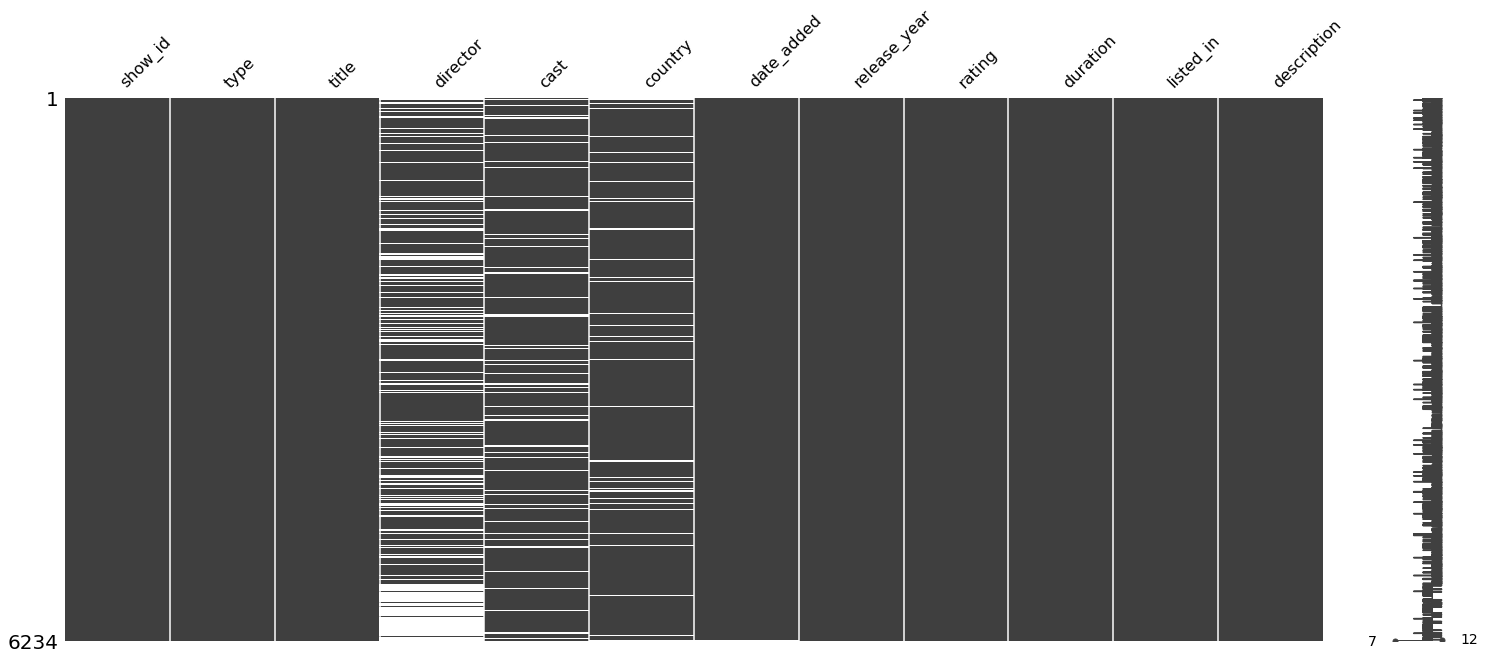

In [9]:
import missingno as msno
msno.matrix(data)
plt.show()

We have null values in director, cast,country,date_added and rating.

In [10]:
#check for unique values
data.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [11]:
#checking for duplicate values
data.duplicated().sum()

0

so we found that there is no null value present

#### making a copy of the dataset

In [12]:
df = data.copy()
df.shape

(6234, 12)

### Drop null values

In [13]:
df = df.dropna()
df.shape

(3774, 12)

In [14]:
# print frist 10 rows
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ..."
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,"September 8, 2017",2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium","September 8, 2017",2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager..."
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,"September 8, 2017",2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f..."


#### Convert Date Time format

In [15]:
# As we have observed while checking the information of the dataset, that dat is in "Object form".
# So we are converting it into DAte time formate
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

## Data Visualization

### Type: Movie and TV Shows

Text(0.5, 1.0, 'Type')

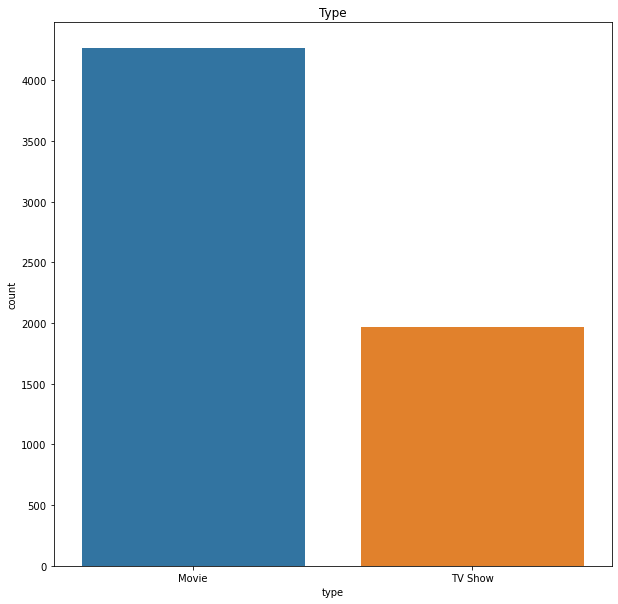

In [16]:
# Plotting the number of tv shows and movies
sns.countplot(data['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

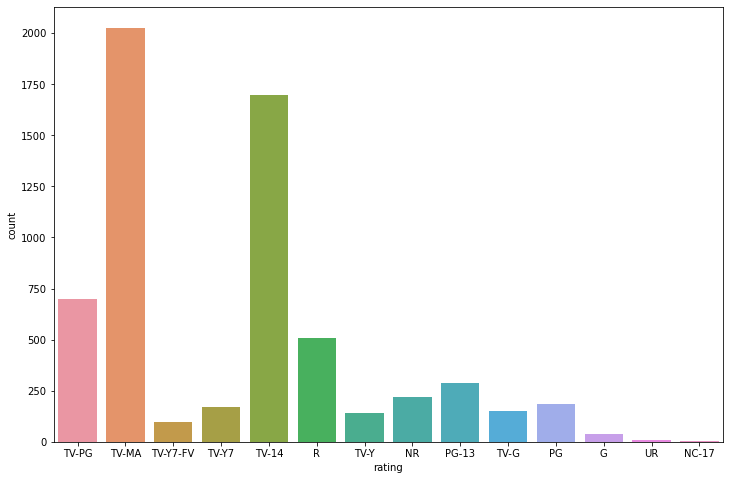

In [17]:
# #plotting the ratings
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = data)

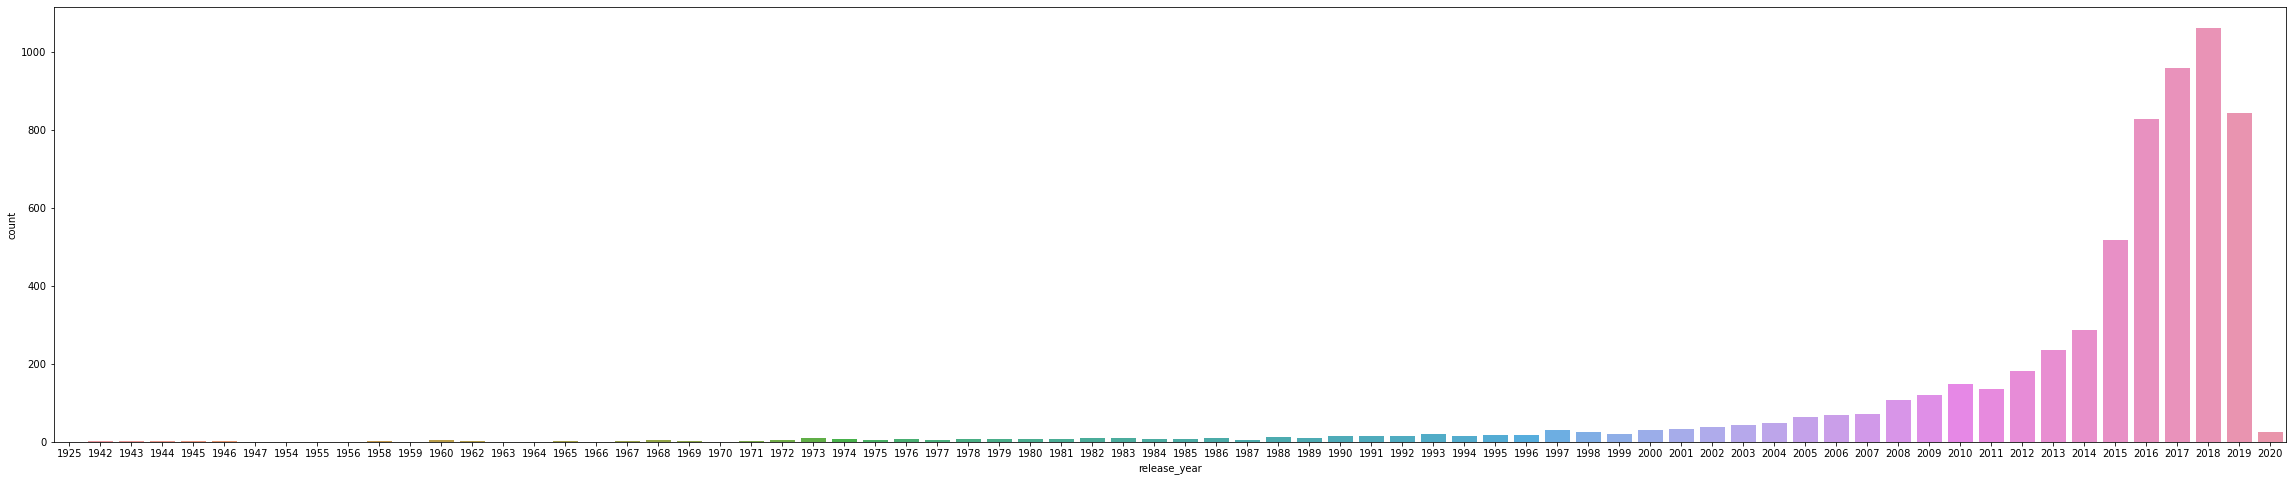

In [18]:
# Plotting the no. of movies relesed per year.
plt.figure(figsize = (40,8))
sns.countplot(x='release_year',data = data)

As we can see most of the Movies and Tv shows on Netflix are Released in the past decade and very few were released earlier

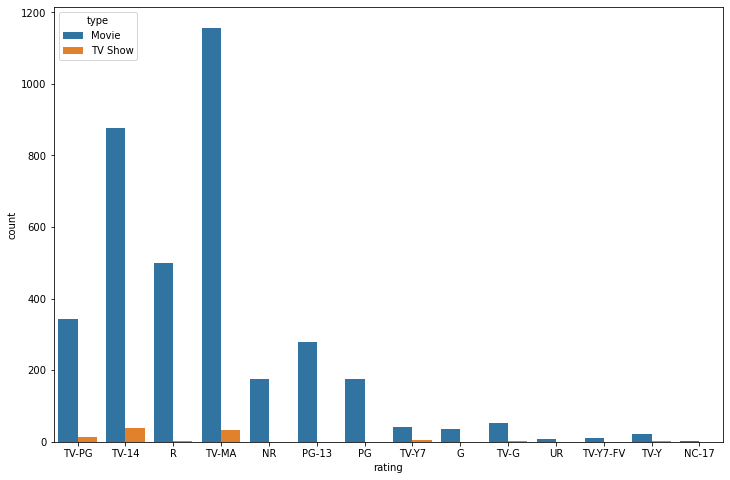

In [19]:
#analysing the type, whether its a movie or a movie v/s the rating it has
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type')

### Pie-chart for the Type: Movie and TV Shows

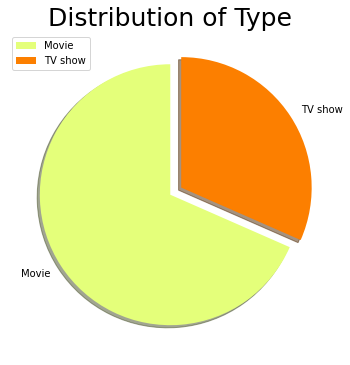

In [20]:
labels = ['Movie', 'TV show']
size = data['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

#### distribution according to countries

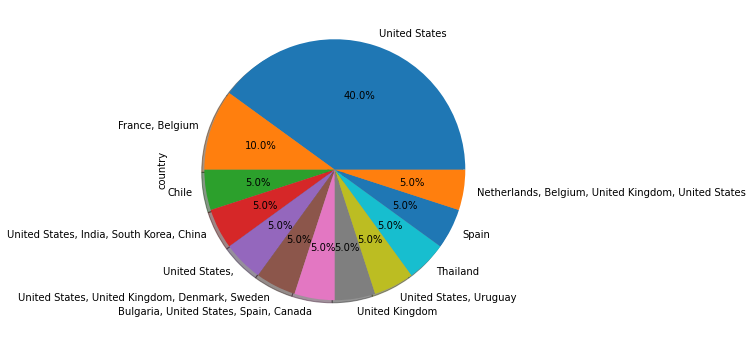

In [21]:
#distribution according to countries(Top 30 countries)
top_rated=data[0:30]
top_rated['country'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.show()


### Pie-chart for Rating

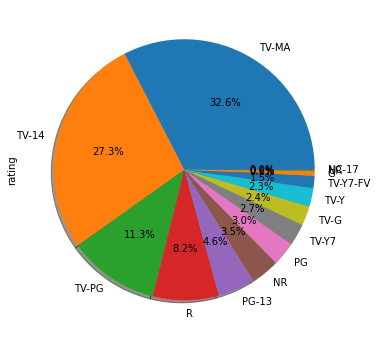

In [22]:
#distribution according to ratings
data['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.show()

In [23]:
df_countries = pd.DataFrame(data.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

,country,count
0,United States,2032
1,India,777
2,United Kingdom,348
3,Japan,176
4,Canada,141


### Frequencies of Tv show and Movies

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

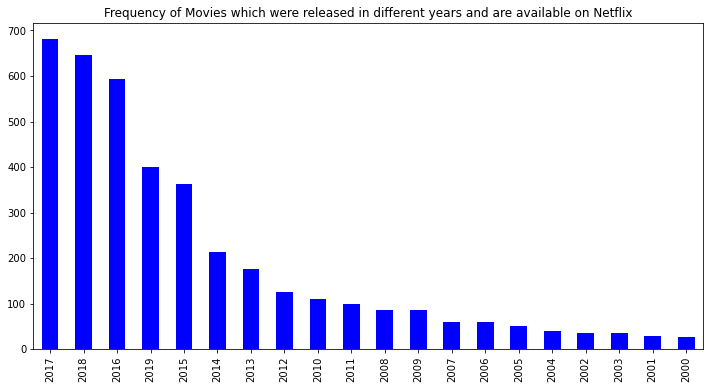

In [24]:
#Frequency of Movies which were released in different years and are available on Netflix

plt.figure(figsize=(12,6))
data[data["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="blue")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")



Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

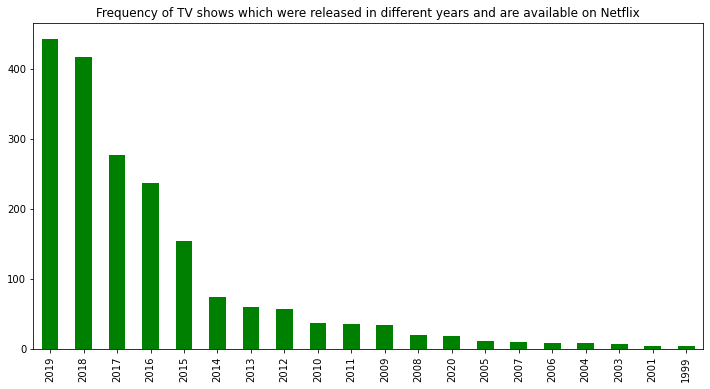

In [25]:
plt.figure(figsize=(12,6))
data[data["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="green")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

### Top 10 genres of movies and Tv shows

Text(0.5, 1.0, 'Top 10 Genres of Movies')

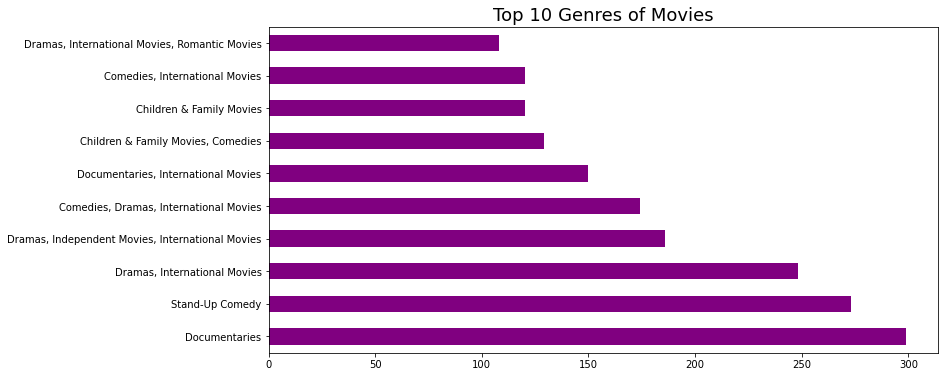

In [26]:
# Top 10 genres of movies
plt.figure(figsize=(12,6))
data[data["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="purple")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

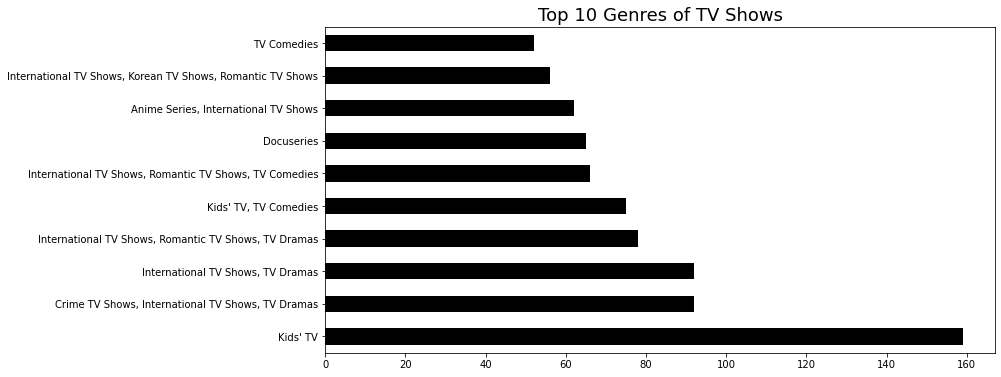

In [27]:
#Top 10 Genres of TV Shows
plt.figure(figsize=(12,6))
data[data["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of TV Shows",size=18)


## WordCloud

In [28]:
from wordcloud import WordCloud

### Country

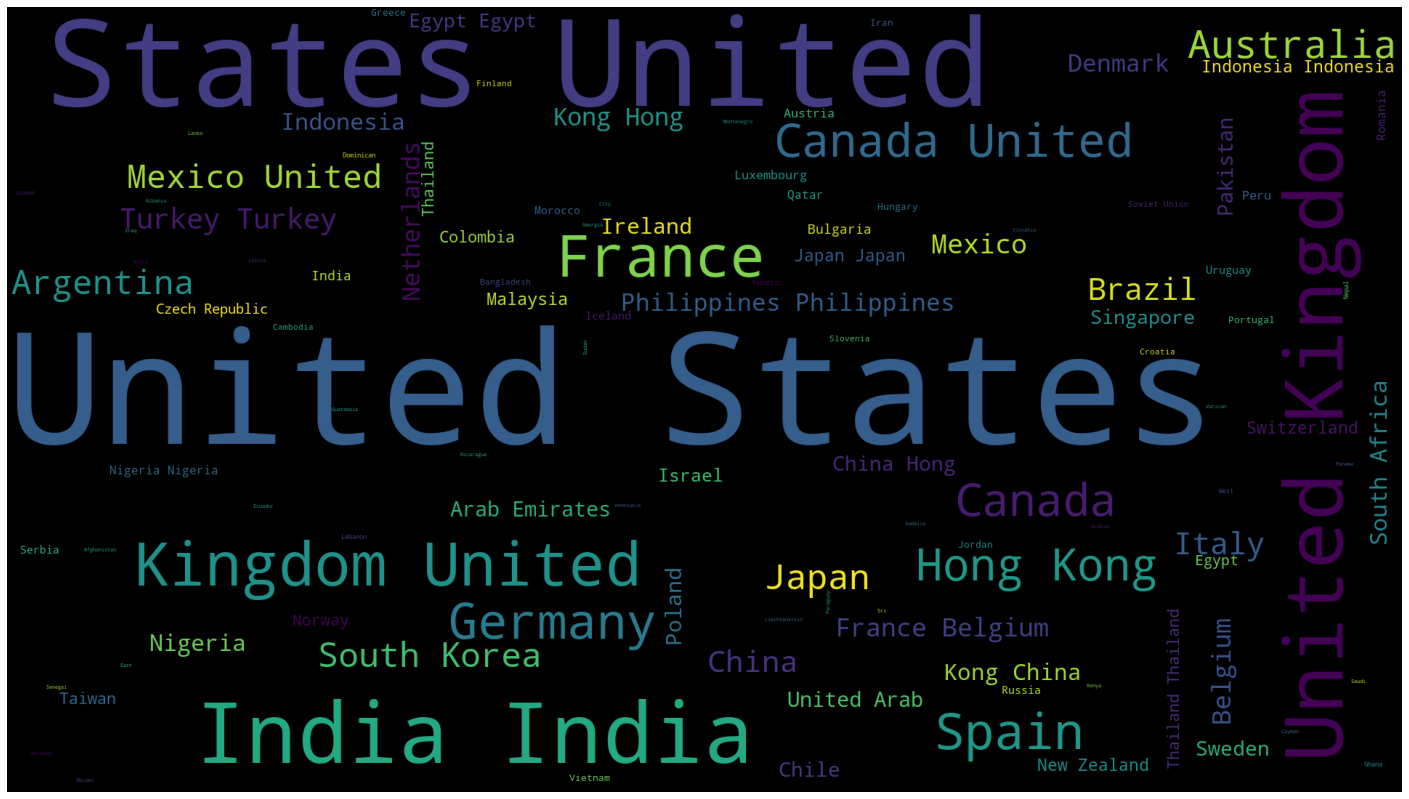

In [29]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

### Cast in the Shows

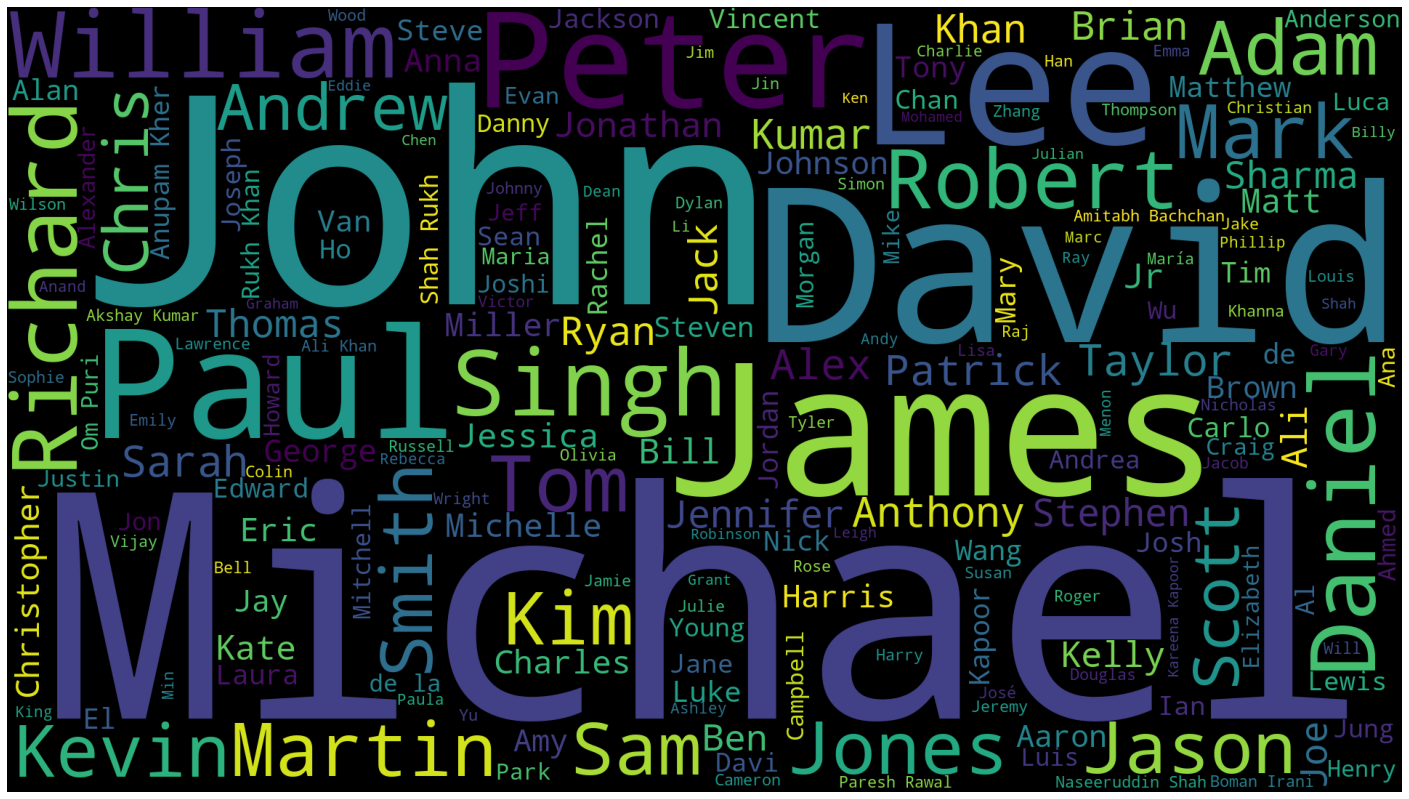

In [30]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

### Directors

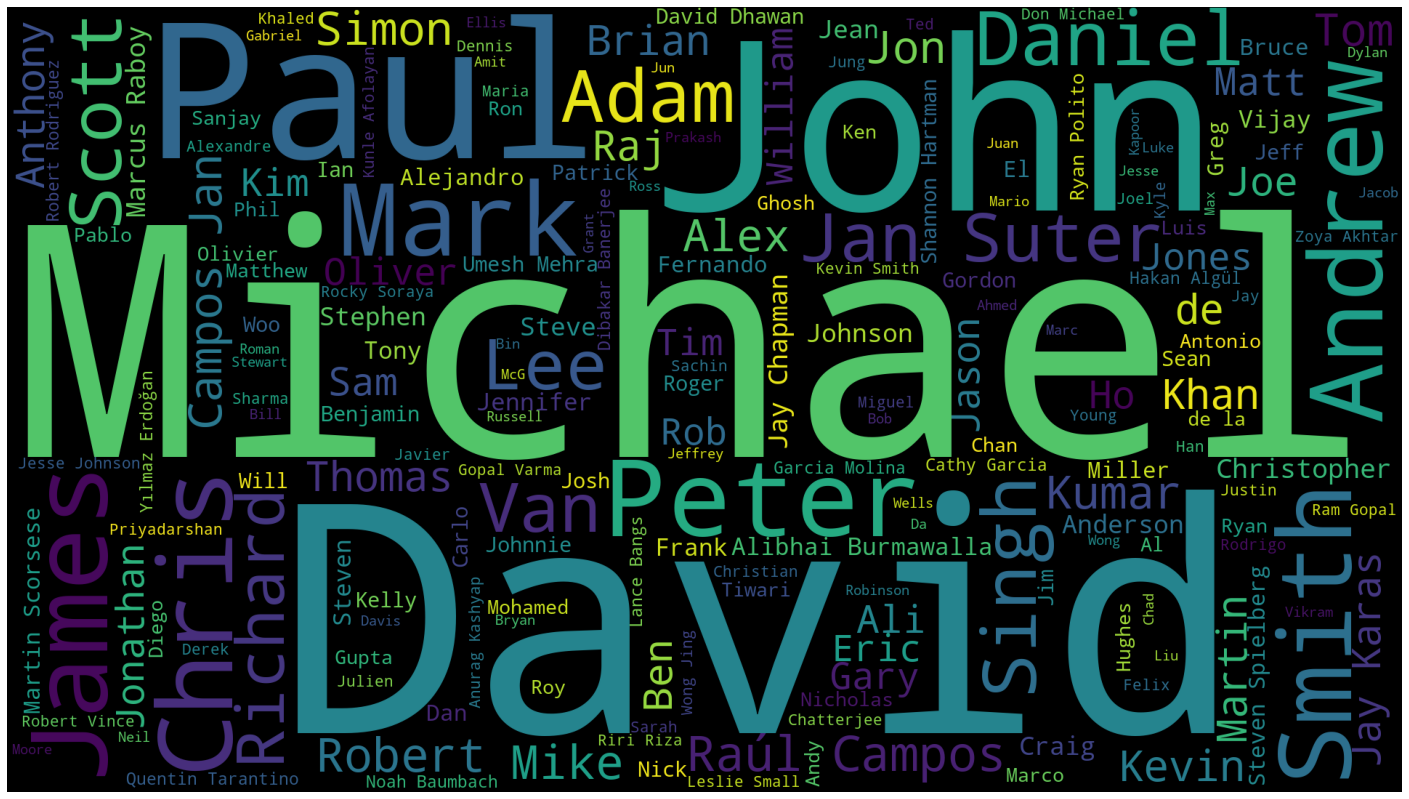

In [31]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

### Categories

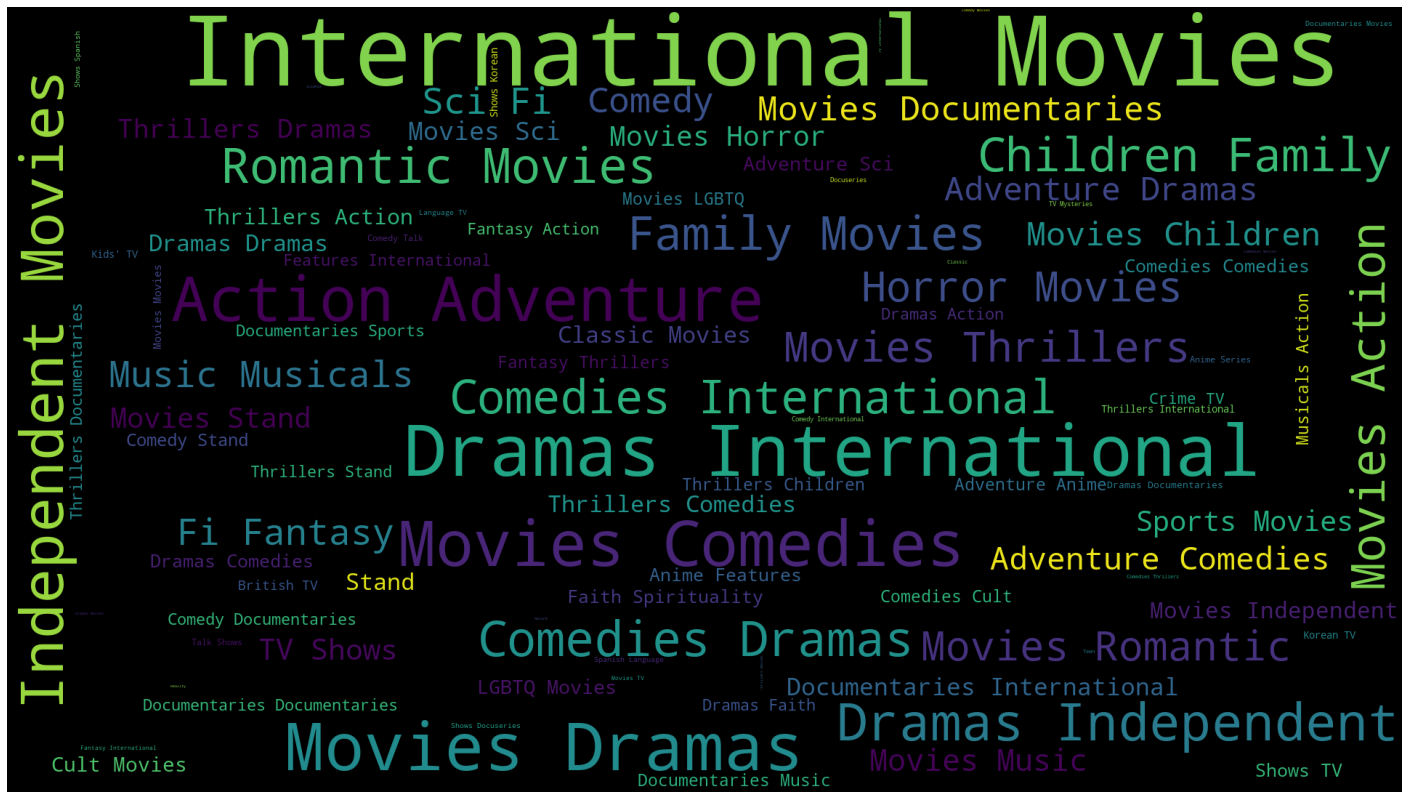

In [32]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

# Thank you !!